In [1]:
from spectral_cube import SpectralCube

In [8]:
import pyspeckit

In [3]:
cube = SpectralCube.read('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults/G351.77/B6/fullcubes_12m/G351.77_B6_spw7_12M_spw7.image.fits')

Cube is a Stokes cube, returning spectral cube for I component


In [4]:
import sys
sys.executable

'/orange/adamginsburg/miniconda3/envs/python39/bin/python'

In [5]:
im = cube[50].value

In [6]:
mxy,mxx = np.unravel_index(np.nanargmax(im), cube.shape[1:])
mxy,mxx

(467, 565)

In [7]:
csp = cube[:,mxy,mxx].to(u.K, u.brightness_temperature(csp.spectral_axis))

NameError: name 'u' is not defined

In [ ]:
sp = pyspeckit.Spectrum.from_hdu(csp.hdu)

In [ ]:
sp.plotter()

In [ ]:
from pyspeckit.spectrum.models import lte_molecule

In [ ]:
from astropy import units as u

In [ ]:
freqs, aij, deg, EU, partfunc = lte_molecule.get_molecular_parameters('CH3OCHO', fmin=200*u.GHz, fmax=250*u.GHz, export_limit=1e5)

In [ ]:
mod = lte_molecule.generate_model(sp.xarr, 0*u.km/u.s, 5*u.km/u.s, 50*u.K, 1e16*u.cm**-2, freqs, aij, deg, EU, partfunc)

In [ ]:
sp.plotter(clear=True)
sp.plotter.axis.plot(sp.xarr, mod)

In [ ]:
offset = np.nanpercentile(sp.data.filled(np.nan), 20)

In [ ]:
for species in ('CH3OH', 'CH3OCHO', 'CH3OCH3', 'CH3CCH', 'CH3CN', 'DCN', 'NH2CHO',):
    freqs, aij, deg, EU, partfunc = lte_molecule.get_molecular_parameters(species, fmin=200*u.GHz, fmax=250*u.GHz, export_limit=1e5)
    mod = lte_molecule.generate_model(sp.xarr, 0*u.km/u.s, 5*u.km/u.s, 50*u.K, 1e17*u.cm**-2, freqs, aij, deg, EU, partfunc)
    sp.plotter(axis=pl.figure().gca())
    sp.plotter.axis.plot(sp.xarr, mod+offset, label=species)
    sp.plotter.axis.set_title(species)

In [1]:
import pyspeckit, imp
imp.reload(pyspeckit)

<module 'pyspeckit' from '/blue/adamginsburg/adamginsburg/repos/pyspeckit/pyspeckit/__init__.py'>

This function (<function BaseSpectralCube.mean at 0x2b7deaa9bdc0>) requires loading the entire cube into memory and may therefore be slow.


AttributeError: 'Column' object has no attribute 'value'

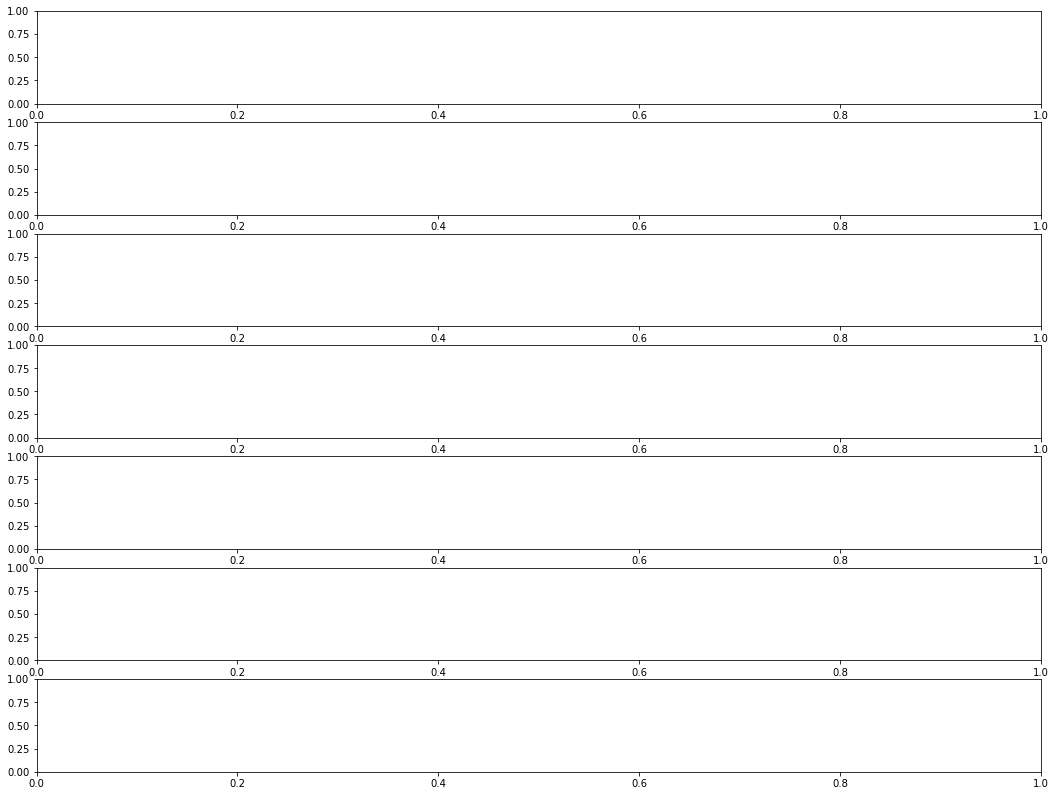

In [2]:
%run /blue/adamginsburg/adamginsburg/repos/pyspeckit/docs/example_LTE_lineforest.py

In [10]:
%debug

> /orange/adamginsburg/repos/pyspeckit/pyspeckit/spectrum/models/lte_molecule.py(336)get_molecular_parameters_JPL()
    334     freqs = jpltbl['FREQ'].quantity
    335     freq_MHz = freqs.to(u.MHz).value
--> 336     deg = jpltbl['GUP'].value
    337     EL = jpltbl['ELO'].quantity.to(u.erg, u.spectral())
    338     dE = freqs.to(u.erg, u.spectral())



ipdb>  jpltbl['GUP']


<Column name='GUP' dtype='int64' length=689>
 39
 77
 25
 65
 59
 51
 69
 31
 61
 37
 66
 19
...
 31
 15
 15
 43
 69
 63
 79
110
 27
 29
 37
 57


ipdb>  q


In [11]:
from astroquery.jplspec import JPLSpec

In [13]:
JPLSpecquery_lines

In [12]:
JPLSpec.get_species_table()

TAG,NAME,NLINE,QLOG1,QLOG2,QLOG3,QLOG4,QLOG5,QLOG6,QLOG7,VER
int64,str13,int64,float64,float64,float64,float64,float64,float64,float64,str2
1001,H-atom,1,0.6021,0.6021,0.6021,0.6021,0.6021,0.6021,0.6021,1
2001,D-atom,1,0.7782,0.7782,0.7782,0.7782,0.7782,0.7782,0.7782,1
3001,HD,1,0.7004,0.5864,0.4315,0.1962,0.0406,0.0014,0.0001,2
4001,H2D+,32,1.8834,1.6986,1.4401,0.9882,0.4919,0.0846,0.0016,2*
7001,Li-6-H,51,1.4493,1.3248,1.1515,0.8603,0.5803,0.3226,0.1138,2*
8001,LiH,53,1.4581,1.3336,1.1602,0.8688,0.5883,0.3297,0.1188,2*
8002,Li-6-D,80,1.6901,1.5631,1.3878,1.0921,0.8029,0.5263,0.2755,1
9001,LiD,90,1.706,1.5788,1.4034,1.1075,0.8173,0.5403,0.2876,1
12001,C-atom,2,0.8939,0.8744,0.8363,0.7295,0.5494,0.3075,0.0962,2
